In [1]:
# 1. C
# 2. A
# 3. B
# 4. A
# 5. B
# 6. D
# 7. C
# 8. B
# 9. B
# 10. C
# 11. C
# 12. A
# 13. B
# 14. B
# 15. A
# 16. A
# 17. C
# 18. C
# 19. D
# 20. B

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [3]:
#1.1
titanic = pd.read_csv(r"C:\Users\basde\Downloads\titanic.csv", delimiter = ";")

In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    object 
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 83.7+ KB


In [5]:
titanic['Fare'] = titanic['Fare'].apply(lambda x: x.replace('.', '', x.count('.') - 1))
titanic['Fare'] = titanic['Fare'].astype('float')
titanic['Fare'] = titanic['Fare'].round()

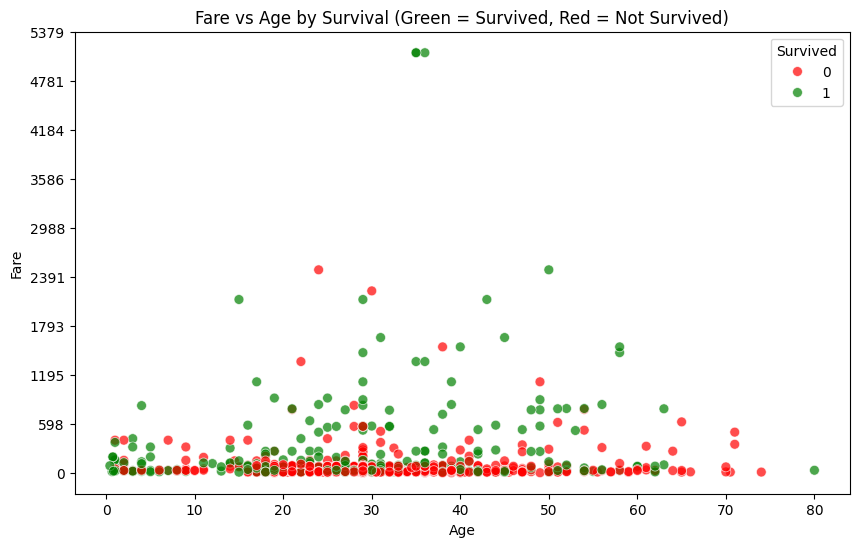

In [6]:
#1.2
plt.figure(figsize=(10, 6))

a = sns.scatterplot(
    data=titanic,
    x='Age',
    y='Fare',
    hue='Survived',  
    palette={1: 'green', 0: 'red'},  
    s=50, 
    alpha=0.7 
)
y_min, y_max = a.get_ylim()
y_ticks = np.linspace(0, y_max, 10)
plt.yticks(y_ticks)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Fare vs Age by Survival (Green = Survived, Red = Not Survived)')

plt.show()

In [7]:
#1.3
from sklearn.model_selection import train_test_split


X = titanic[['Pclass','Sex', 'Age']]
y = titanic['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [8]:
#1.4
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

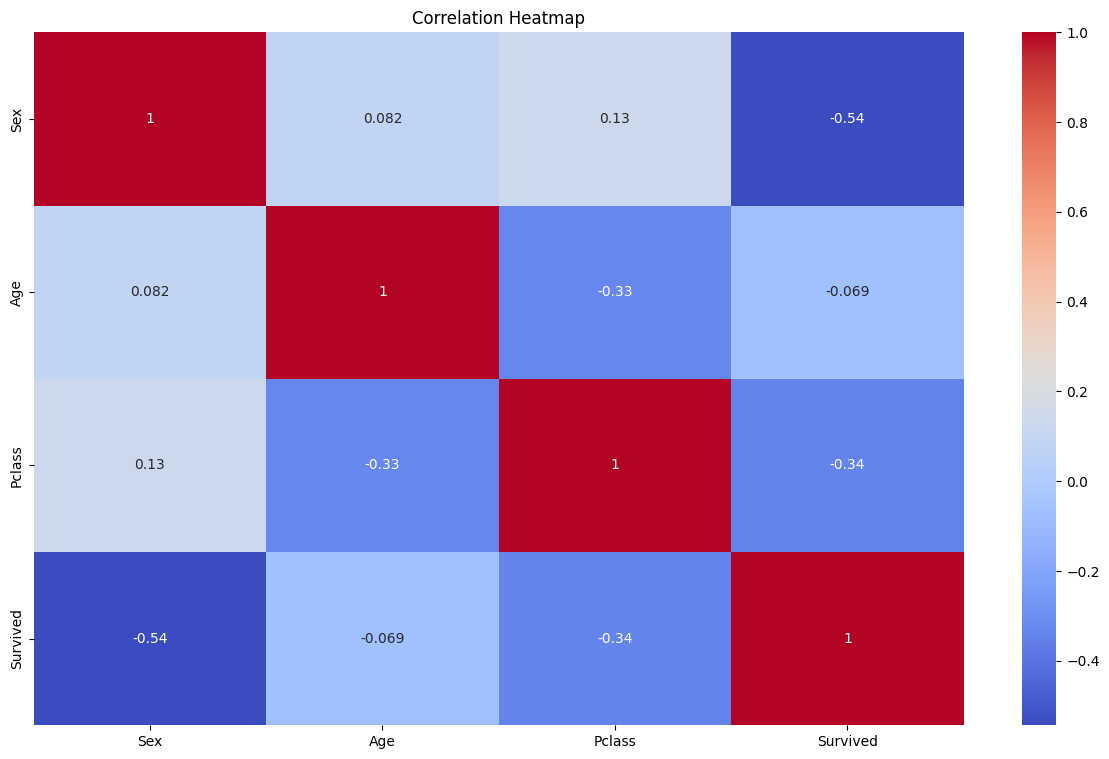

In [9]:
#1.5
plt.figure(figsize=(15, 9))
sns.heatmap(titanic[['Sex', 'Age', 'Pclass', 'Survived']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

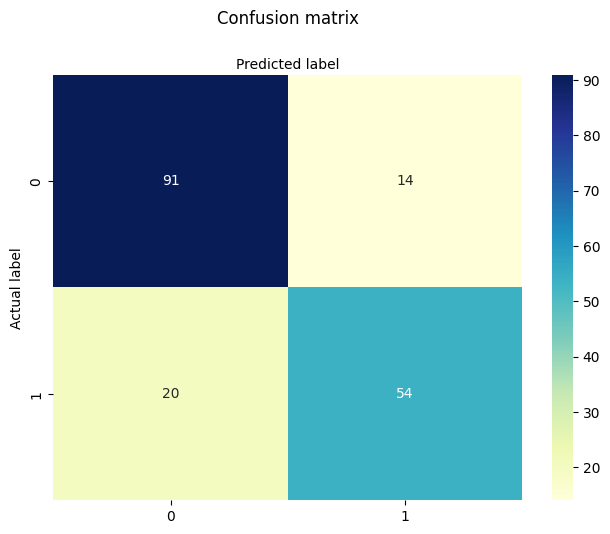

In [10]:
#1.6
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [11]:
#2.1
from sklearn.linear_model import LinearRegression

X = titanic.loc[:, ['Sex', 'Age', 'Pclass']].values
y = titanic.loc[:, 'Survived'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=1) # 0.25 x 0.8 = 0.2

In [12]:
from sklearn.model_selection import cross_val_score

lm = LogisticRegression()
X = titanic.loc[:, ['Sex']].values
scores = cross_val_score(lm, X, y, cv=10, scoring='accuracy') 
print("Accuracy scores for each fold:", scores)


average_accuracy = scores.mean()
print("Average Accuracy:", average_accuracy)
# convert from MSE to RMSE
std_accuracy = scores.std()
print("Standard Deviation of Accuracy:", std_accuracy)

Accuracy scores for each fold: [0.81111111 0.79775281 0.76404494 0.84269663 0.79775281 0.7752809
 0.76404494 0.74157303 0.80898876 0.76404494]
Average Accuracy: 0.786729088639201
Standard Deviation of Accuracy: 0.028599350013463757


In [13]:
X = titanic.loc[:, ['Age']].values
scores = cross_val_score(lm, X, y, cv=10, scoring='accuracy') 
print("Accuracy scores for each fold:", scores)


average_accuracy = scores.mean()
print("Average Accuracy:", average_accuracy)
std_accuracy = scores.std()
print("Standard Deviation of Accuracy:", std_accuracy)


Accuracy scores for each fold: [0.61111111 0.61797753 0.61797753 0.61797753 0.61797753 0.61797753
 0.61797753 0.61797753 0.61797753 0.60674157]
Average Accuracy: 0.616167290886392
Standard Deviation of Accuracy: 0.0037499970776218366


In [14]:
X = titanic.loc[:, ['Pclass']].values
scores = cross_val_score(lm, X, y, cv=10, scoring='accuracy') 
print("Accuracy scores for each fold:", scores)


average_accuracy = scores.mean()
print("Average Accuracy:", average_accuracy)
std_accuracy = scores.std()
print("Standard Deviation of Accuracy:", std_accuracy)



Accuracy scores for each fold: [0.58888889 0.61797753 0.68539326 0.66292135 0.69662921 0.65168539
 0.70786517 0.73033708 0.70786517 0.74157303]
Average Accuracy: 0.6791136079900124
Standard Deviation of Accuracy: 0.04627869397494182


In [15]:
#2.1 gesclacht is de beste variable voor deze classificatie

In [16]:
#3.1
from sklearn.neighbors import KNeighborsClassifier
data = pd.read_csv(r"C:\Users\basde\Downloads\pima.csv")

In [17]:
X = data[['Number of times pregnant', 'Glucose', 'Blood Pressure', 'Tricep skin',
       'insulin', 'BMI', 'Diabetes pedigree function', 'Age']]
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [18]:
#3.1
k=17
model = KNeighborsClassifier(n_neighbors = k, weights='uniform')
model.fit(X_train.values, y_train.values)
print(model.score(X_test.values,y_test.values))
model = KNeighborsClassifier(n_neighbors = k, weights='uniform')
model.fit(X_train.values, y_train.values)
print(model.score(X_train.values,y_train.values))

0.7696335078534031
0.777972027972028


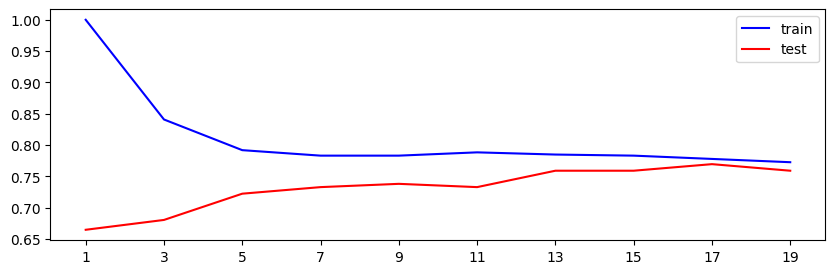

In [19]:
train = []
test = []
r = range (1,21,2)

for k in r:
    # Euclidan, 'straight' distance
    model = KNeighborsClassifier(n_neighbors = k, weights='uniform')
    model.fit(X_train.values, y_train.values)
    test.append(model.score(X_test.values,y_test.values))
    # Distance is inversely proportional (to lessen the weight of outliers)
    model = KNeighborsClassifier(n_neighbors = k, weights='uniform')
    model.fit(X_train.values, y_train.values)
    train.append(model.score(X_train.values,y_train.values))
    
train = np.array(train)
test = np.array(test)

plt.rcParams['figure.figsize'] = [10, 3]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
plt.plot(r,train,label='train',color='blue')
plt.plot(r,test,label='test',color='red')
plt.legend()
plt.gca().set_xticks(r)
plt.show()

In [20]:
#3.2 G-Het beste aantal neighbours is 17

In [21]:
# 4.1
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(X_train, y_train)
# Make predictions on the testing set
y_pred = model.predict(X_test)
# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       122
           1       0.74      0.61      0.67        69

    accuracy                           0.78       191
   macro avg       0.77      0.74      0.75       191
weighted avg       0.78      0.78      0.77       191



<Axes: >

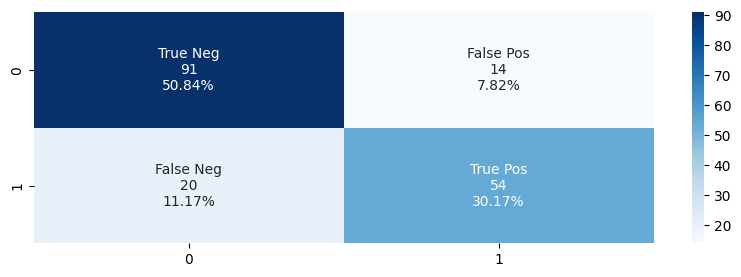

In [22]:
#4.2
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
cnf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
cnf_matrix.flatten()/np.sum(cnf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues')